In [1]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model




C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:

import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.preprocessing import image

# Define a function for the data generator
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True, batch_size=1, target_size=(24,24), class_mode='categorical'):
    return gen.flow_from_directory(dir, batch_size=batch_size, shuffle=shuffle, color_mode='grayscale', class_mode=class_mode, target_size=target_size)

BS = 32
TS = (24, 24)
train_batch = generator('Drowsiness detection/data/train', shuffle=True, batch_size=BS, target_size=TS)
valid_batch = generator('Drowsiness detection/data/test', shuffle=True, batch_size=BS, target_size=TS)

# Calculate steps per epoch and validation steps
SPE = len(train_batch.classes) // BS
VS = len(valid_batch.classes) // BS
print(SPE, VS)


Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.
77 13


In [ ]:
import os
import cv2


test_images_dir = 'Drowsiness detection/data/test'


for class_name in os.listdir(test_images_dir):
    class_path = os.path.join(test_images_dir, class_name)
    
   
    if os.path.isdir(class_path):
        print(f"Class: {class_name}")
        
        # Load and display a few images from each class
        for i, file_name in enumerate(os.listdir(class_path)):
            if i >= 3:  # Display only the first 3 images for each class
                break
            
            img_path = os.path.join(class_path, file_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            
            img = cv2.resize(img, (24, 24))
            
            cv2.imshow(f"Class: {class_name}, Image {i + 1}", img)
            
           
            key = cv2.waitKey(0)
            
           
            if key == 113:
                cv2.destroyAllWindows()  
                exit()  


cv2.destroyAllWindows()


Class: Closed
Class: no_yawn
Class: Open
Class: yawn


In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 1)),
    MaxPooling2D(pool_size=(1, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1, 1)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(train_batch, validation_data=valid_batch, epochs=15, steps_per_epoch=SPE, validation_steps=VS)


C:\Users\user\AppData\Local\Temp\ipykernel_5500\402426793.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_batch, validation_data=valid_batch, epochs=15, steps_per_epoch=SPE, validation_steps=VS)


Epoch 1/15
77/77 [==============================] - 32s 390ms/step - loss: 0.6534 - accuracy: 0.6797 - val_loss: 0.4160 - val_accuracy: 0.7957
Epoch 2/15
77/77 [==============================] - 23s 298ms/step - loss: 0.4012 - accuracy: 0.7955 - val_loss: 0.3688 - val_accuracy: 0.8125
Epoch 3/15
77/77 [==============================] - 23s 295ms/step - loss: 0.3374 - accuracy: 0.8357 - val_loss: 0.3536 - val_accuracy: 0.8125
Epoch 4/15
77/77 [==============================] - 23s 299ms/step - loss: 0.3078 - accuracy: 0.8522 - val_loss: 0.3009 - val_accuracy: 0.8389
Epoch 5/15
77/77 [==============================] - 24s 307ms/step - loss: 0.2778 - accuracy: 0.8694 - val_loss: 0.3726 - val_accuracy: 0.8389
Epoch 6/15
77/77 [==============================] - 23s 295ms/step - loss: 0.2435 - accuracy: 0.8825 - val_loss: 0.3525 - val_accuracy: 0.8389
Epoch 7/15
77/77 [==============================] - 23s 296ms/step - loss: 0.2196 - accuracy: 0.9068 - val_loss: 0.2430 - val_accuracy: 0.8678

In [ ]:
print(train_batch.image_shape)


(24, 24, 1)


In [28]:

print(valid_batch.image_shape)


(24, 24, 1)


C:\Users\user\AppData\Local\Temp\ipykernel_5500\834259572.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_batch, validation_data=valid_batch, epochs=15, steps_per_epoch=SPE, validation_steps=VS)


Epoch 1/15
77/77 [==============================] - 26s 338ms/step - loss: 0.0558 - accuracy: 0.9795 - val_loss: 0.2335 - val_accuracy: 0.9303
Epoch 2/15
77/77 [==============================] - 23s 294ms/step - loss: 0.0528 - accuracy: 0.9803 - val_loss: 0.1394 - val_accuracy: 0.9543
Epoch 3/15
77/77 [==============================] - 22s 291ms/step - loss: 0.0476 - accuracy: 0.9819 - val_loss: 0.2173 - val_accuracy: 0.9327
Epoch 4/15
77/77 [==============================] - 22s 291ms/step - loss: 0.0339 - accuracy: 0.9873 - val_loss: 0.2052 - val_accuracy: 0.9447
Epoch 5/15
77/77 [==============================] - 23s 294ms/step - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.1795 - val_accuracy: 0.9519
Epoch 6/15
77/77 [==============================] - 23s 296ms/step - loss: 0.0258 - accuracy: 0.9893 - val_loss: 0.2039 - val_accuracy: 0.9519
Epoch 7/15
77/77 [==============================] - 22s 291ms/step - loss: 0.0334 - accuracy: 0.9897 - val_loss: 0.2045 - val_accuracy: 0.9447

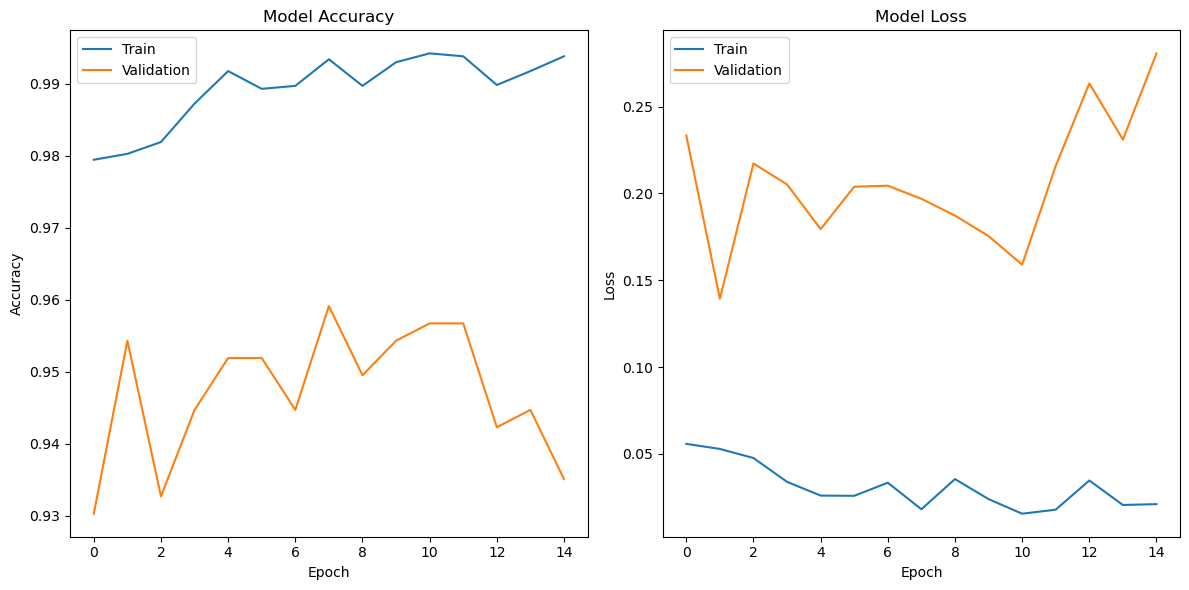

In [ ]:
import matplotlib.pyplot as plt



# Train the model and save the training history
history = model.fit_generator(train_batch, validation_data=valid_batch, epochs=15, steps_per_epoch=SPE, validation_steps=VS)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


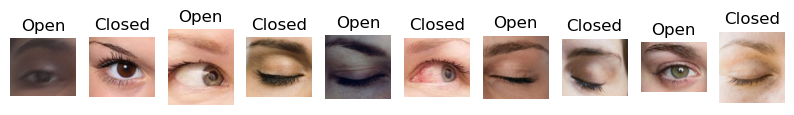

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import shuffle

IMAGES_PATH = os.path.join('Drowsiness detection/data', 'test')
labels = ['Open', 'Closed']
number_imgs = 5

def display_images(images, labels):
    fig = plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        ax = fig.add_subplot(1, len(images), i + 1)
        img = mpimg.imread(images[i])
        ax.imshow(img)
        ax.set_title(labels[i % len(labels)])  
        ax.axis('off')
    plt.show()

def load_images_labels(path, label, num_images):
    image_files = [os.path.join(path, label, f) for f in os.listdir(os.path.join(path, label))][:num_images]
    return image_files

# Load and shuffle images
all_images = []
for label in labels:
    images = load_images_labels(IMAGES_PATH, label, number_imgs)
    all_images.extend(images)

total_loaded_images = len(all_images)
if total_loaded_images < len(labels) * number_imgs:
    print(f"Warning: Not enough images loaded. Total loaded images: {total_loaded_images}, Expected: {len(labels) * number_imgs}")

shuffle(all_images)

display_images(all_images, labels)


In [68]:

model.save('Drowsiness detection/modeldrows.h5', overwrite=True)

C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
